In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2


In [5]:
# Checking for missing values
print(data.isnull().sum())
# non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print("Non-Numeric Columns:", non_numeric_columns)

timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE               3107
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                   81
label_source                          0
Length: 278, dtype: int64
Non-Numeric Columns: []


In [13]:
# filling the nukk vakues with mean in numwric columns
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


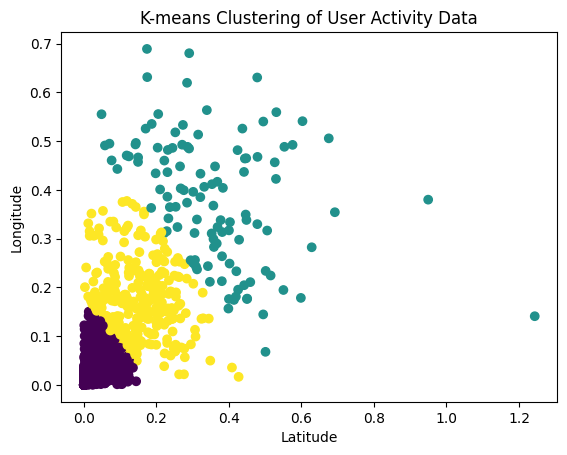

In [16]:
from sklearn.cluster import KMeans
location_data = data[['location:log_latitude_range', 'location:log_longitude_range']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(location_data)
labels = kmeans.labels_

plt.scatter(location_data['location:log_latitude_range'], location_data['location:log_longitude_range'], c=labels)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-means Clustering of User Activity Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


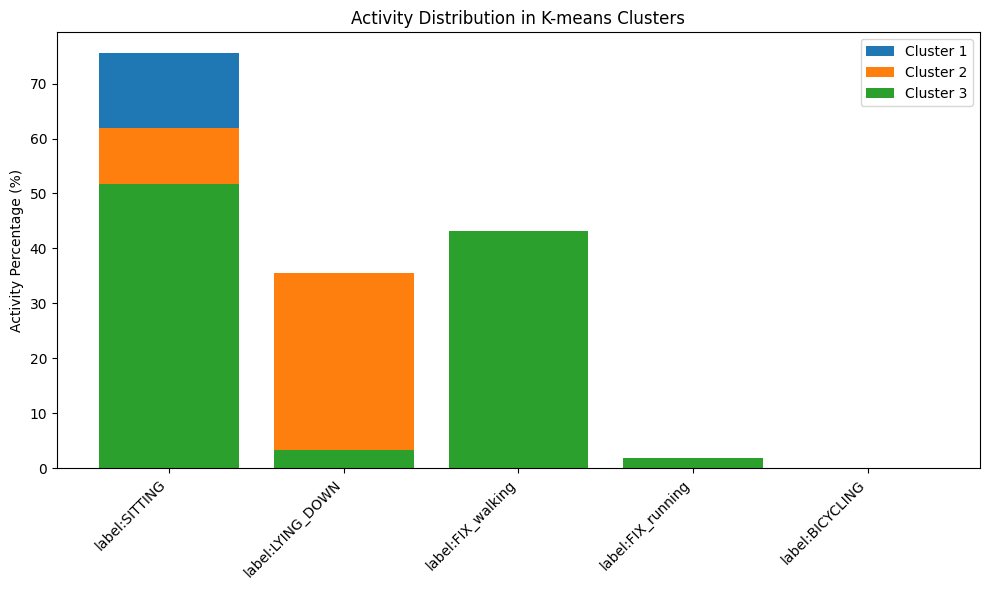

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


activity_cols = ["label:SITTING", "label:LYING_DOWN", "label:FIX_walking", "label:FIX_running", "label:BICYCLING"]
activity_data = data[activity_cols]

location_data = data[['location:log_latitude_range', 'location:log_longitude_range']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(location_data)
labels = kmeans.labels_


def get_activity_percentages(activity_data, labels, cluster_index):
    cluster_data = activity_data.iloc[labels == cluster_index]
    activity_counts = cluster_data.sum(axis=0)
    total_activities = activity_counts.sum()
    percentages = (activity_counts / total_activities) * 100
    return percentages.round(2)


cluster_percentages = []
for cluster in range(kmeans.n_clusters):
    cluster_percentages.append(get_activity_percentages(activity_data, labels, cluster))


cluster_labels = [f"Cluster {i+1}" for i in range(kmeans.n_clusters)]
x = range(len(activity_cols))

fig, ax = plt.subplots(figsize=(10, 6))
for i, cluster in enumerate(cluster_percentages):
    ax.bar(x, cluster, label=cluster_labels[i])

ax.set_xticks(x)
ax.set_xticklabels(activity_cols, rotation=45, ha='right')
ax.set_ylabel('Activity Percentage (%)')
ax.set_title('Activity Distribution in K-means Clusters')
ax.legend()

plt.tight_layout()
plt.show()
